# XGBoost(eXtreme Gradient Boosting)
- 과적합 방지가 가능한 규제가 포함되어 있다.
- CART(Classification And Regression Tree)를 기반으로 함. 분류와 회귀 둘 다 가능하다.
- 조기종료(early stopping)을 제공한다.
- 앙상블 부스팅의 특징인 가중치 부여를 경사하강법(gradient descent)으로 한다.

In [2]:
# xgboost 설치 : dos command 창에서 
# conda install -c anaconda py-xgboost

# XGBoost 버전 확인
import xgboost

print(xgboost.__version__)

1.5.0


In [2]:
# 위스콘신 유방암 예측
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") # warning을 무시해줌. 
# 다 무시하는게 아니라 검은색으로 출력되게끔 해줌.

In [4]:
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
print(dataset.target_names, '\n')
print(cancer_df['target'].value_counts()) # 총 569개

['malignant' 'benign'] 

1    357
0    212
Name: target, dtype: int64


In [8]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 컬럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 커럼에서 맨 마지막 두번째 컬럼까지를 : 
# -1 슬라이싱으로
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출(test_size=0.2). # seed = random_state
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size=0.2, random_state=156)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


### 사이킷런 wrapper XGBoost의 적용

In [11]:
# 사이킷런 wrapper SGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3) # 최적의 튜닝값 n_estimators = 적용이 좋은 의사결정트리 갯수
# 의사결정트리가 앙상블에 가장 적용이 좋다. # 부스팅은 XGBoost가 의사결정트리 알고리즘이 가장 적용이 좋다.
# learning_rate=0.1를 적용은 곧, gradient descent를 적용. # 의사결정트리처럼 max_depth 최대 깊이 지정해줌. 
# 마치 하이퍼 파라미터처럼 적용해주는 과정에 있음 

xgb_wrapper.fit(X_train, y_train)

w_preds = xgb_wrapper.predict(X_test) # test값을 넣어서 예측해줌.
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[11:09:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [14]:
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score, recall_score # 정밀도, 재현율
from sklearn.metrics import f1_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    

In [15]:
get_clf_eval(y_test, w_preds)

정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806


In [16]:
# 조기 종료(early stopping)을 제공.

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)  
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
# logloss 로그 손실값 

ws100_preds = xgb_wrapper.predict(X_test) # test값을 넣어서 예측해줌.
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
# 더이상 손실이 줄어들지 않을 때 400 셋팅값을 채우지 않고 멈추게 됨.
# early_stopping_rounds=100 최소 100번까지는 해보라는 것.

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [17]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744


In [19]:
# 조기 종료(early stopping)을 제공.

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)  
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
# logloss 로그 손실값 

ws10_preds = xgb_wrapper.predict(X_test) # test값을 넣어서 예측해줌.
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
# 더이상 손실이 줄어들지 않을 때 400 셋팅값을 채우지 않고 멈추게 됨.
# early_stopping_rounds=10 최소 10번까지는 해보라는 것.

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [20]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

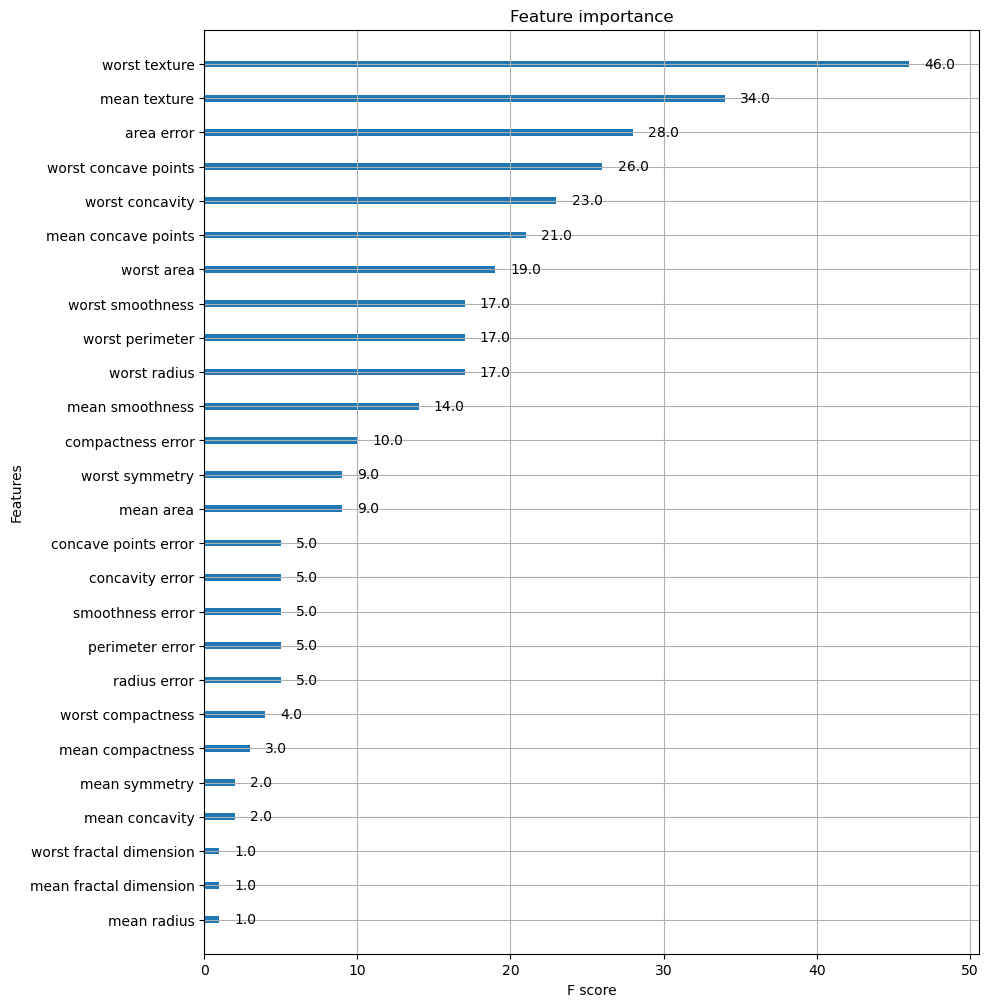

In [21]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_wrapper, ax=ax) # ax에서 반환해주는 축값